In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2

In [5]:
df=pd.read_csv('diabetes-3.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [14]:
modelno=Sequential([
    Dense(64,input_shape=(xtrain.shape[1],),activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
modelno.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
historyno=modelno.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6448 - loss: 0.6673 - val_accuracy: 0.6911 - val_loss: 0.6166
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7589 - loss: 0.5768 - val_accuracy: 0.7480 - val_loss: 0.5712
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7529 - loss: 0.5322 - val_accuracy: 0.7480 - val_loss: 0.5375
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7788 - loss: 0.4780 - val_accuracy: 0.7480 - val_loss: 0.5157
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7753 - loss: 0.4591 - val_accuracy: 0.7398 - val_loss: 0.4982
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7746 - loss: 0.4543 - val_accuracy: 0.7398 - val_loss: 0.4873
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8154 - loss: 0.3974 - val_accuracy: 0.7398 - val_loss: 0.4803
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7754 - loss: 0.4498 - val_accuracy: 0.7398 - val_loss

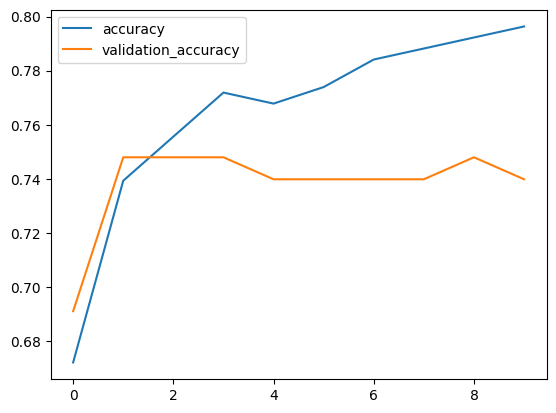

In [18]:
plt.plot(historyno.history['accuracy'],label='accuracy')
plt.plot(historyno.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()

In [20]:
modelwith=Sequential([
    Dense(256,input_shape=(xtrain.shape[1],),activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dense(256,activation='relu',kernel_regularizer=l2(0.02)),
    Dense(1,activation='sigmoid')
])
modelwith.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
historywith=modelwith.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_split=0.02)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6482 - loss: 2.5080 - val_accuracy: 0.4615 - val_loss: 2.1433
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7491 - loss: 1.7330 - val_accuracy: 0.3077 - val_loss: 1.7544
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 1.2218 - val_accuracy: 0.3077 - val_loss: 1.5181
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.9262 - val_accuracy: 0.4615 - val_loss: 1.2034
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7856 - loss: 0.7359 - val_accuracy: 0.4615 - val_loss: 1.1054
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7669 - loss: 0.6535 - val_accuracy: 0.3846 - val_loss: 1.0396
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8074 - loss: 0.5364 - val_accuracy: 0.3846 - val_loss: 1.0029
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8127 - loss: 0.4827 - val_accuracy: 0.3846 - val_loss

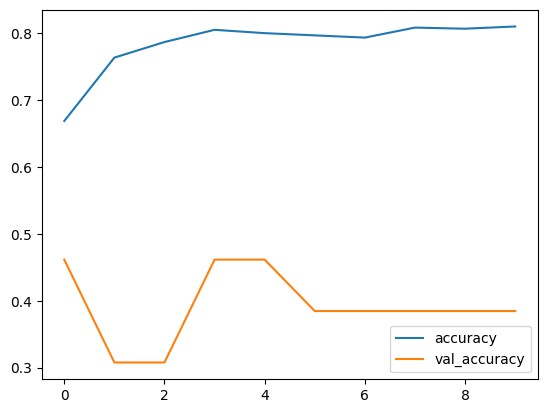

In [22]:
plt.plot(historywith.history['accuracy'],label='accuracy')
plt.plot(historywith.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

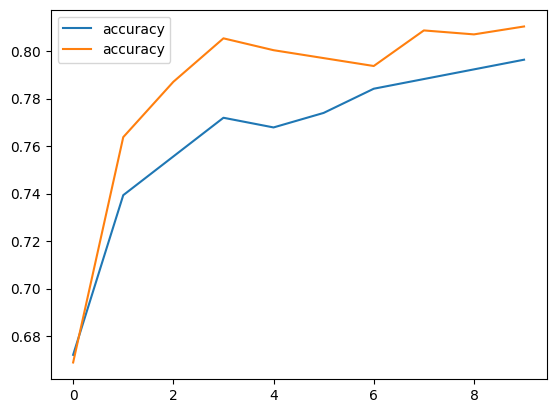

In [23]:
plt.plot(historyno.history['accuracy'],label='accuracy')
plt.plot(historywith.history['accuracy'],label='accuracy')
plt.legend()
plt.show()